# Regression Assignment 

### Problem Statement 

   A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

## Step 1: Reading and Understanding the Data

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

In [2]:
# Importing the csv file
day = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the shape of the dataset
day.shape

(730, 16)

In [5]:
# checking the info
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualising the Data

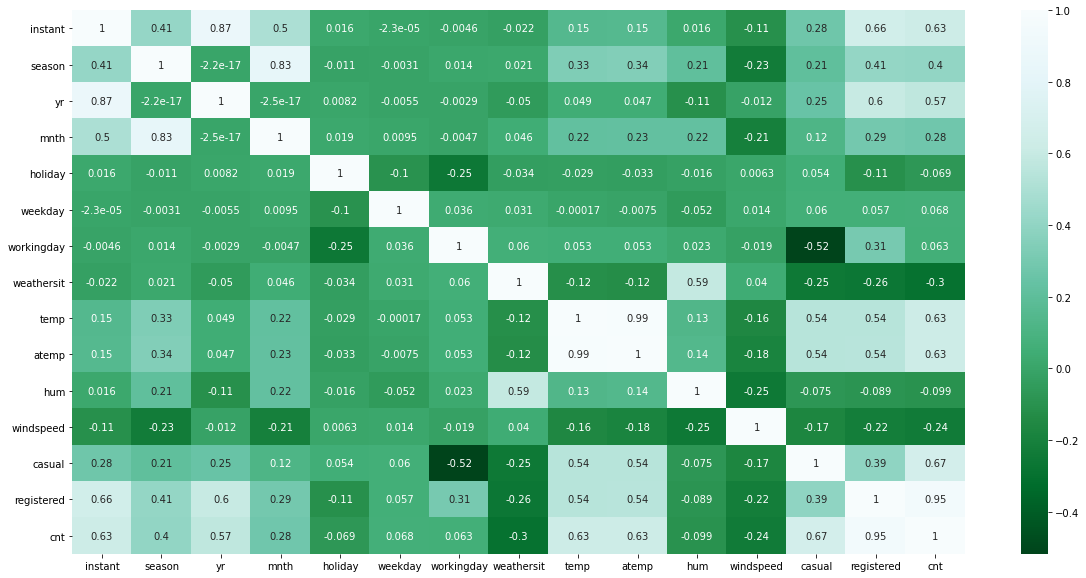

In [7]:
# checking the correlation between the variables
plt.figure(figsize=(20,10))
sns.heatmap(day.corr(), cmap="BuGn_r", annot = True)
plt.show()

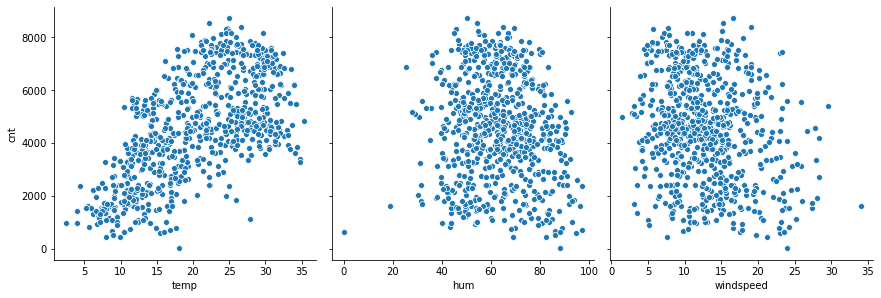

In [8]:
# checking the distribution of the numerical variables across the target variable.
sns.pairplot(day, x_vars=['temp', 'hum', 'windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

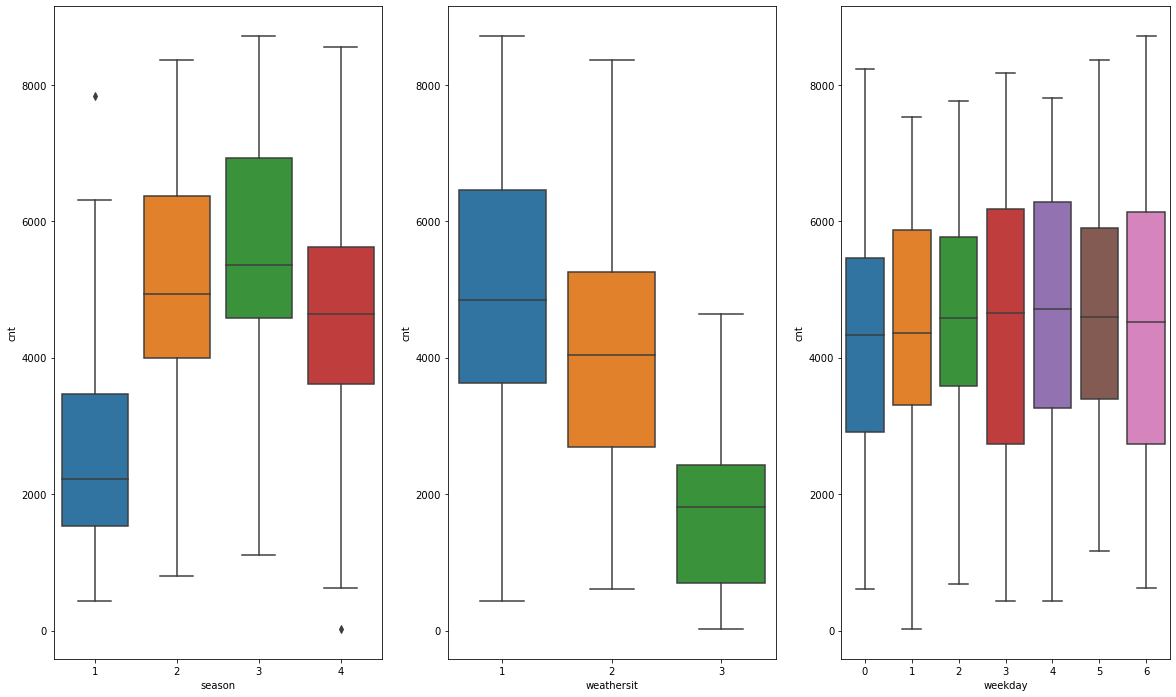

In [9]:
# checking the outliers in the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(1,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(1,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.show()

## Step 3: Data Preparation

In [10]:
# dropping the unwanted variables
day.drop(['instant','atemp','casual','registered','dteday'], axis = 1, inplace = True)

In [11]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [12]:
# Replacing categorical column with their corresponding categories
season = {1 : 'Spring', 2 : 'Summer' , 3 : 'Fall' ,  4 : 'Winter'} 
weekday =  {0 : 'Sunday' ,1 : 'Monday', 2 : 'Tuesday' , 3 : 'Wednesday' ,  4 : 'Thursday', 5 : 'Friday' , 6 : 'Saturday'} 
weathersit = {1 : 'Clear', 2 : 'Mist & Cloudy' , 3 : 'Light Snow Rain' ,  4 : 'Heavy Snow Rain'} 
mnth = { 1 : 'January', 2 : 'February' , 3 : 'March' ,  4 : 'April', 5 : 'May' , 6 : 'June', 7 : 'July', 8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'} 

In [13]:
day.season = [season[item] for item in day.season] 
day.weekday = [weekday[item] for item in day.weekday] 
day.weathersit = [weathersit[item] for item in day.weathersit] 
day.mnth = [mnth[item] for item in day.mnth] 

In [14]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


### Dummy Variables

In [15]:
#creating dummy variables for the categorical variables in a separate variable
season = pd.get_dummies(day['season'], drop_first = True)
weekday = pd.get_dummies(day['weekday'], drop_first = True)
weathersit = pd.get_dummies(day['weathersit'], drop_first = True)
mnth = pd.get_dummies(day['mnth'], drop_first = True)

In [16]:
# Adding the results to the original day dataframe
day = pd.concat([day, season, weekday, weathersit, mnth], axis = 1)

In [17]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,December,February,January,July,June,March,May,November,October,September
0,Spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,Spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [18]:
# Dropping the original categorical variables from which dummy variables are created
day.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

## Splitting the Data into Training and Testing Sets

In [19]:
# splitting the dataset into training and testing sets randomly

from sklearn.model_selection import train_test_split

day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
# Scaling the numerical variables using Min-Max Scaler on the training set
numerical_vars = ['temp', 'hum', 'windspeed', 'cnt']

day_train[numerical_vars] = scaler.fit_transform(day_train[numerical_vars])

day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,December,February,January,July,June,March,May,November,October,September
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
day_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,December,February,January,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [23]:
# assigning variables as X and y on the training set
y_train = day_train.pop('cnt')
X_train = day_train

### RFE - Recursive Feature Elimination

In [63]:
# Running the RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
# Running RFE
rfe = RFE(lm,15)            
rfe = rfe.fit(X_train, y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Light Snow Rain', True, 1),
 ('Mist & Cloudy', True, 1),
 ('August', False, 6),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 5),
 ('November', False, 2),
 ('October', False, 10),
 ('September', True, 1)]

In [27]:
column = X_train.columns[rfe.support_]
column

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Saturday', 'Light Snow Rain', 'Mist & Cloudy',
       'January', 'July', 'September'],
      dtype='object')

In [28]:
X_train.columns[~rfe.support_]

Index(['Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'August',
       'December', 'February', 'June', 'March', 'May', 'November', 'October'],
      dtype='object')

### Building model using statsmodel

In [29]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[column]

In [30]:
# Adding a constant variable to X_train 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe

,const,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Saturday,Light Snow Rain,Mist & Cloudy,January,July,September
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,1,0,1,0,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,0,1,0,0,0
578,1.0,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,1.0,0,0,0,0.248216,0.577930,0.431816,0,0,1,1,0,1,0,0,0


In [31]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  
lm.params

const              0.251042
yr                 0.230502
holiday           -0.058529
workingday         0.043521
temp               0.509836
hum               -0.154716
windspeed         -0.185956
Spring            -0.050806
Summer             0.049660
Winter             0.094426
Saturday           0.053721
Light Snow Rain   -0.248777
Mist & Cloudy     -0.057824
January           -0.034326
July              -0.053193
September          0.081186
dtype: float64

In [32]:
#summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.31e-191
Time:                        23:01:23   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2510      0.036      6.949      0.000       0.180       0.322
yr                  0.2305      0.008     28.807      0.000       0.215       0.246
holiday            -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday          0.0435      0.012      3.781      0.000       0.021       0.066
temp                0.5098      0.034     14.851      0.000       0.442       0.577
hum                -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed          -0.1860      0.025     -7.301      0.000      -0.236      -0.136
Spring             -0.0508      0.021     -2.461      0.014      -0.091      -0.010
Summer              0.0497      0.015      3.346      0.001       0.020       0.079
Winter              0.0944      0.017      5.479      0.000       0.061       0.128
Saturday            0.0537      0.014      3.707      0.000       0.025       0.082
Light Snow Rain    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
Mist & Cloudy      -0.0578      0.010     -5.574      0.000      -0.078      -0.037
January            -0.0343      0.017     -1.980      0.048      -0.068      -0.000
July               -0.0532      0.018     -2.947      0.003      -0.089      -0.018
September           0.0812      0.016      4.934      0.000       0.049       0.114
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#dropping the constant variable from the X_train variables to check the VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [34]:
# Calculating the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,Spring,4.53
8,Winter,3.48
7,Summer,2.84
11,Mist & Cloudy,2.29
0,yr,2.09
9,Saturday,1.98


### Dropping a variable with high VIF and creating the model

In [35]:
#dropping the variable with high VIF and creating the model again
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [36]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [37]:
#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [38]:
#summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          7.33e-189
Time:                        23:01:23   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.031      5.525      0.000       0.112       0.235
yr                  0.2344      0.008     29.019      0.000       0.218       0.250
holiday            -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday          0.0465      0.012      3.983      0.000       0.024       0.069
temp                0.4728      0.034     14.037      0.000       0.407       0.539
windspeed          -0.1563      0.025     -6.292      0.000      -0.205      -0.107
Spring             -0.0597      0.021     -2.861      0.004      -0.101      -0.019
Summer              0.0434      0.015      2.890      0.004       0.014       0.073
Winter              0.0797      0.017      4.650      0.000       0.046       0.113
Saturday            0.0584      0.015      3.980      0.000       0.030       0.087
Light Snow Rain    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
Mist & Cloudy      -0.0826      0.009     -9.592      0.000      -0.100      -0.066
January            -0.0389      0.018     -2.215      0.027      -0.073      -0.004
July               -0.0482      0.018     -2.635      0.009      -0.084      -0.012
September           0.0753      0.017      4.522      0.000       0.043       0.108
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#dropping the constant variable from the X_train variables to check the VIF
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [40]:
#Checking the VIF's of the model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,Spring,3.08
6,Summer,2.33
0,yr,2.08
7,Winter,1.99
8,Saturday,1.97
11,January,1.62
12,July,1.59


### Dropping the variable and updating the model

In [41]:
#dropping the variable with high VIF and creating the model again
X_train_new = X_train_lm.drop(["temp"], axis = 1)

In [42]:
#Adding a constant variable
X_train_lm_1 =  sm.add_constant(X_train_new)

In [43]:
#Running the linear model
lm_model= sm.OLS(y_train,X_train_lm_1).fit()
lm_model.params

const              0.544807
yr                 0.247764
holiday           -0.057113
workingday         0.048020
windspeed         -0.187831
Spring            -0.260282
Summer            -0.044001
Winter            -0.074896
Saturday           0.056390
Light Snow Rain   -0.304452
Mist & Cloudy     -0.089625
January           -0.102448
July              -0.009855
September          0.070843
dtype: float64

In [44]:
#summary of our linear model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.04e-154
Time:                        23:01:23   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5448      0.020     27.136      0.000       0.505       0.584
yr                  0.2478      0.009     26.156      0.000       0.229       0.266
holiday            -0.0571      0.032     -1.771      0.077      -0.120       0.006
workingday          0.0480      0.014      3.482      0.001       0.021       0.075
windspeed          -0.1878      0.029     -6.429      0.000      -0.245      -0.130
Spring             -0.2603      0.018    -14.490      0.000      -0.296      -0.225
Summer             -0.0440      0.016     -2.729      0.007      -0.076      -0.012
Winter             -0.0749      0.016     -4.829      0.000      -0.105      -0.044
Saturday            0.0564      0.017      3.252      0.001       0.022       0.090
Light Snow Rain    -0.3045      0.029    -10.634      0.000      -0.361      -0.248
Mist & Cloudy      -0.0896      0.010     -8.824      0.000      -0.110      -0.070
January            -0.1024      0.020     -5.104      0.000      -0.142      -0.063
July               -0.0099      0.021     -0.461      0.645      -0.052       0.032
September           0.0708      0.020      3.601      0.000       0.032       0.109
==============================================================================
Omnibus:                       34.622   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.832
Skew:                          -0.419   Prob(JB):                     3.07e-15
Kurtosis:                       4.563   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#dropping the constant variable from the X_train variables to check the VIF
X_train_lm_1 = X_train_lm_1.drop(['const'], axis=1)

In [46]:
#Checking the VIF's of the model
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1.values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,Spring,2.97
5,Summer,2.27
6,Winter,1.99
0,yr,1.91
7,Saturday,1.69
10,January,1.60
9,Mist & Cloudy,1.56
11,July,1.30


### Dropping the variable and updating the model

In [47]:
#dropping the constant variable from the X_train variables to check the VIF
X_train_new = X_train_lm_1.drop(["windspeed"], axis = 1)

In [48]:
#Adding a constant variable
X_train_lm_2 =  sm.add_constant(X_train_new)

In [49]:
#Running the linear model
lm_mod= sm.OLS(y_train,X_train_lm_2).fit()
lm_mod.params

const              0.493926
yr                 0.246788
holiday           -0.061080
workingday         0.048800
Spring            -0.284481
Summer            -0.059272
Winter            -0.078259
Saturday           0.052886
Light Snow Rain   -0.323005
Mist & Cloudy     -0.088213
January           -0.088167
July              -0.008956
September          0.076304
dtype: float64

In [50]:
#summary of our linear model
lm_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     133.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.26e-146
Time:                        23:01:24   Log-Likelihood:                 405.31
No. Observations:                 510   AIC:                            -784.6
Df Residuals:                     497   BIC:                            -729.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4939      0.019     25.745      0.000       0.456       0.532
yr                  0.2468      0.010     25.059      0.000       0.227       0.266
holiday            -0.0611      0.034     -1.822      0.069      -0.127       0.005
workingday          0.0488      0.014      3.404      0.001       0.021       0.077
Spring             -0.2845      0.018    -15.577      0.000      -0.320      -0.249
Summer             -0.0593      0.017     -3.574      0.000      -0.092      -0.027
Winter             -0.0783      0.016     -4.855      0.000      -0.110      -0.047
Saturday            0.0529      0.018      2.935      0.003       0.017       0.088
Light Snow Rain    -0.3230      0.030    -10.906      0.000      -0.381      -0.265
Mist & Cloudy      -0.0882      0.011     -8.355      0.000      -0.109      -0.067
January            -0.0882      0.021     -4.251      0.000      -0.129      -0.047
July               -0.0090      0.022     -0.403      0.687      -0.053       0.035
September           0.0763      0.020      3.734      0.000       0.036       0.116
==============================================================================
Omnibus:                       43.251   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.105
Skew:                          -0.440   Prob(JB):                     1.50e-23
Kurtosis:                       5.043   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#dropping the constant variable from the X_train variables to check the VIF
X_train_lm_2 = X_train_lm_2.drop(['const'], axis=1)

In [52]:
#Checking the VIF's of the model
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,3.49
3,Spring,2.41
4,Summer,1.91
0,yr,1.88
5,Winter,1.81
6,Saturday,1.59
9,January,1.58
8,Mist & Cloudy,1.56
10,July,1.25
11,September,1.24


## Residual Analysis of the training set

In [53]:
# Adding constant to the X_train variables of the final model
X_train_lm_2 =  sm.add_constant(X_train_new)

In [54]:
# Calculating the y_train_pred from the X_train variables of the final model
y_train_pred = lm_mod.predict(X_train_lm_2)
y_train_pred

653    0.711255
576    0.780558
426    0.420906
728    0.456234
482    0.646115
         ...   
526    0.642029
578    0.789514
53     0.258245
350    0.380340
79     0.395241
Length: 510, dtype: float64

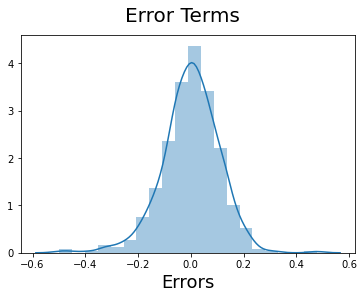

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

## Making predictions using the final model

In [56]:
# scaling the numerical variables using the Min-Max Scaler on the test data-set
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

day_test[num_vars] = scaler.transform(day_test[num_vars])

In [57]:
day_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,December,February,January,July,June,March,May,November,October,September
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [58]:
# assigning variables as X and y on the test set
y_test = day_test.pop('cnt')
X_test = day_test

In [59]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
X_test_new = X_test_lm[X_train_lm_2.columns]

In [60]:
# Calculating the y_test_red from the X_test variables of the final model
y_test_pred = lm_mod.predict(X_test_new)

#### Checking the R-squared on the test set

In [61]:
# Checking the R-square value of the test set
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7489054114875596

## Model Evaluation

Text(0, 0.5, 'y_pred')

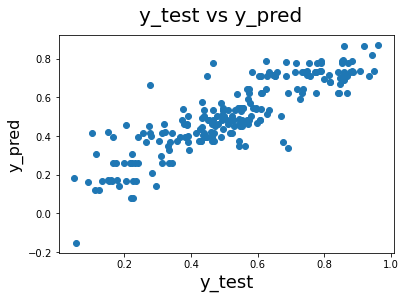

In [62]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

The equation of our best fitted line is:

cnt = (0.246788 * yr) - (0.061080* holiday) + (0.048800 * workingday) - (0.284481 * Spring) - (0.059272 * Summer) - (0.078259 * Winter) + (0.052886 * Saturday) - (0.323005 * Light Snow Rain) - (0.088213 * Mist & Cloudy) - (0.088167 * January) - (0.008956 * July) + (0.076304 * September) 

From the above equation it is evident that the variables are both positively and negetively correlated to the target variable, where one unit increase in positive correlated variable will lead to increase in the value of the target variable multiplied by the co-efficient of the respective variable whereas one unit increase in the negative correlated varibale would lead to decrese in the value of the target variable multiplied by the co-efficient of the variable